In [3]:
import sympy as smp
from sympy import *
import numpy as np
from numpy import *
import scipy as sp
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d
from scipy.integrate import odeint
from fractions import Fraction
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science', 'notebook', 'grid'])

x, y, t, n, a, b, C, c, r, u, s, A = smp.symbols('x y t n a b C c r u s A')
f, g, m = smp.symbols('f g m', cls=smp.Function)

# Example 1 -- Unit Tangent Vector

Tangent vector is a vector that is tangent to or surface of a given point

r(t) =< 3cos(t), t, 3sin(t)>

In [9]:
from sympy.vector import CoordSys3D
# Define the 3D coordinate system
N = CoordSys3D('N')

r = 3*smp.cos(t)*N.i + t*N.j + 3*smp.sin(t)*N.k

r_prime = smp.diff(r, t)

T = r_prime / r_prime.magnitude()

T.simplify()

(-3*sqrt(10)*sin(t)/10)*N.i + (sqrt(10)/10)*N.j + (3*sqrt(10)*cos(t)/10)*N.k

# Example 2 -- Unit Normal Vector

Unit Normal Vector tells us in which direction the tangent vector is changing

N = T'/ ||T'||

r(t) = <3cos(t), t, 3sin(t)>

In [14]:
from sympy.vector import CoordSys3D
# Define the 3D coordinate system
N = CoordSys3D('N')

r = 3*smp.cos(t)*N.i + t*N.j + 3*smp.sin(t)*N.k

T_prime = smp.diff(T, t)

N = T_prime / T_prime.magnitude()

N.simplify()

(-cos(t))*N.i + (-sin(t))*N.k

# Example 3 -- Unit Tangent Vector and Unit Normal Vector

r(t) = <2e^t, (e^t)sin(t), (e^t)cos(t)>

In [62]:
from sympy.vector import CoordSys3D
# Define the 3D coordinate system
N = CoordSys3D('N')

r = (2*smp.exp(t))*N.i + ((smp.exp(t))*smp.sin(t))*N.j + ((smp.exp(t))*smp.cos(t))*N.k

r_prime = smp.diff(r, t)

T = r_prime / r_prime.magnitude()

T.simplify()

(sqrt(6)*exp(t)/(3*sqrt(exp(2*t))))*N.i + (sqrt(3)*exp(t)*sin(t + pi/4)/(3*sqrt(exp(2*t))))*N.j + (sqrt(3)*exp(t)*cos(t + pi/4)/(3*sqrt(exp(2*t))))*N.k

In [63]:
from sympy.vector import CoordSys3D
# Define the 3D coordinate system
N = CoordSys3D('N')

T_prime = smp.diff(T, t)

N = T_prime / T_prime.magnitude()

N.simplify()

(sqrt(3)*exp(-t)*sqrt(exp(2*t))*cos(t + pi/4)/(3*sqrt((sin(t)**6 - 3*sin(t)**4 + 3*sin(t)**2 + cos(t)**6 + 8)/(sin(t)**6 - 3*sin(t)**4 + 3*sin(t)**2 + cos(t)**6 + 26))))*N.j + (-sqrt(3)*exp(-t)*sqrt(exp(2*t))*sin(t + pi/4)/(3*sqrt((sin(t)**6 - 3*sin(t)**4 + 3*sin(t)**2 + cos(t)**6 + 8)/(sin(t)**6 - 3*sin(t)**4 + 3*sin(t)**2 + cos(t)**6 + 26))))*N.k

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


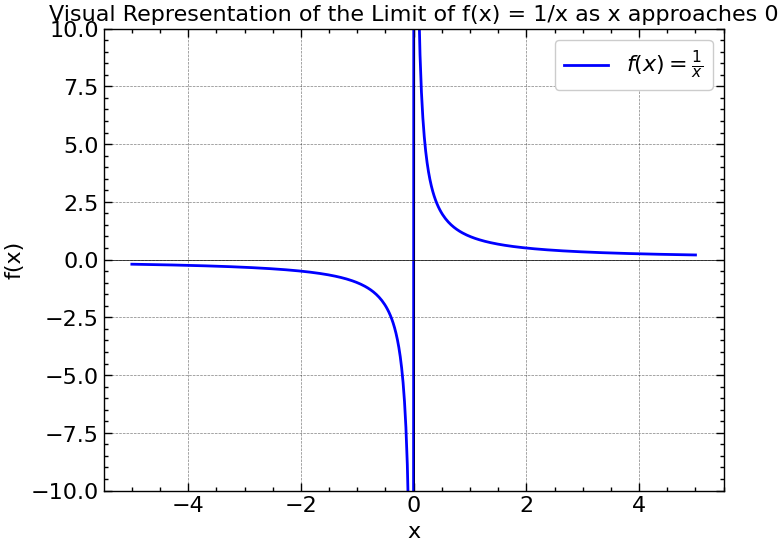

In [2]:
# Define the variable and function
x = smp.symbols('x')
f = 1/x

# Compute the limit as x approaches 0 from the right
limit_right = smp.limit(f, x, 0, dir='+')

# Compute the limit as x approaches 0 from the left
limit_left = smp.limit(f, x, 0, dir='-')

# Create a lambda function for plotting
f_lambda = smp.lambdify(x, f, "numpy")

# Generate x values
x_vals = np.linspace(-5, 5, 400)
y_vals = f_lambda(x_vals)

# Plot the function
plt.figure(figsize=(8,6))
plt.plot(x_vals, y_vals, label=r'$f(x)=\frac{1}{x}$', color='blue')

# Highlight the limit points
plt.scatter([0, 0], [limit_left, limit_right], color='red')  # Limits from left and right
plt.text(0.1, limit_right, f'{limit_right}', verticalalignment='bottom', horizontalalignment='right', color='red')
plt.text(0.1, limit_left, f'{limit_left}', verticalalignment='top', horizontalalignment='right', color='red')

# Set plot limits and labels
plt.ylim(-10, 10)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.title('Visual Representation of the Limit of f(x) = 1/x as x approaches 0')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

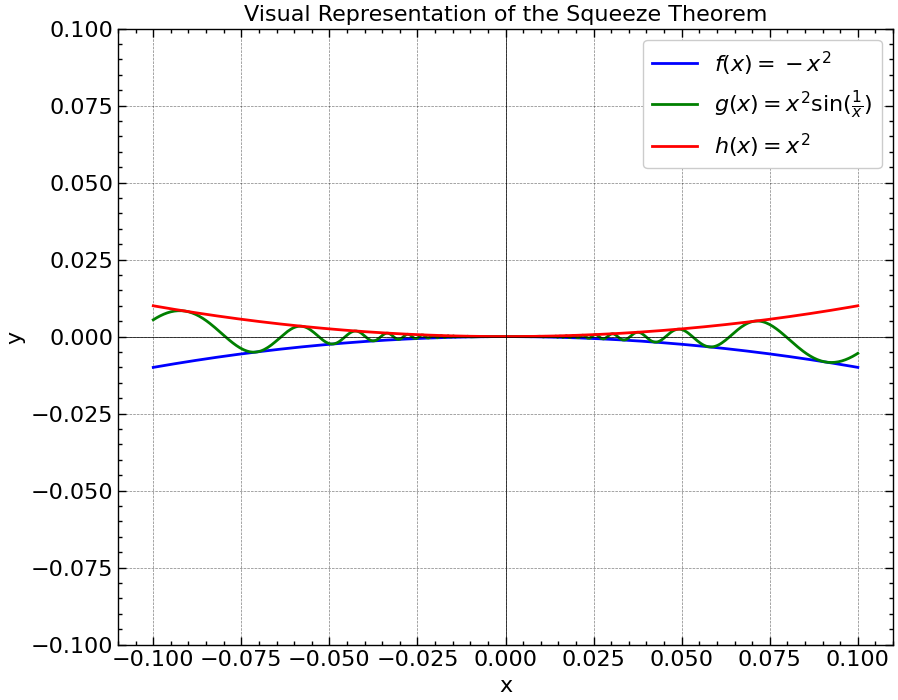

In [4]:
# Define the variable and functions
x = smp.symbols('x')
f = -x**2
g = x**2 * smp.sin(1/x)
h = x**2

# Create lambda functions for plotting
f_lambda = smp.lambdify(x, f, "numpy")
g_lambda = smp.lambdify(x, g, "numpy")
h_lambda = smp.lambdify(x, h, "numpy")

# Generate x values (excluding x=0 for g(x) due to the 1/x term)
x_vals = np.linspace(-0.1, 0.1, 400)
x_vals = x_vals[x_vals != 0]
f_vals = f_lambda(x_vals)
g_vals = g_lambda(x_vals)
h_vals = h_lambda(x_vals)

# Plot the functions
plt.figure(figsize=(10,8))
plt.plot(x_vals, f_vals, label=r'$f(x)=-x^2$', color='blue')
plt.plot(x_vals, g_vals, label=r'$g(x)=x^2 \sin(\frac{1}{x})$', color='green')
plt.plot(x_vals, h_vals, label=r'$h(x)=x^2$', color='red')

# Set plot limits and labels
plt.ylim(-0.1, 0.1)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.title('Visual Representation of the Squeeze Theorem')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

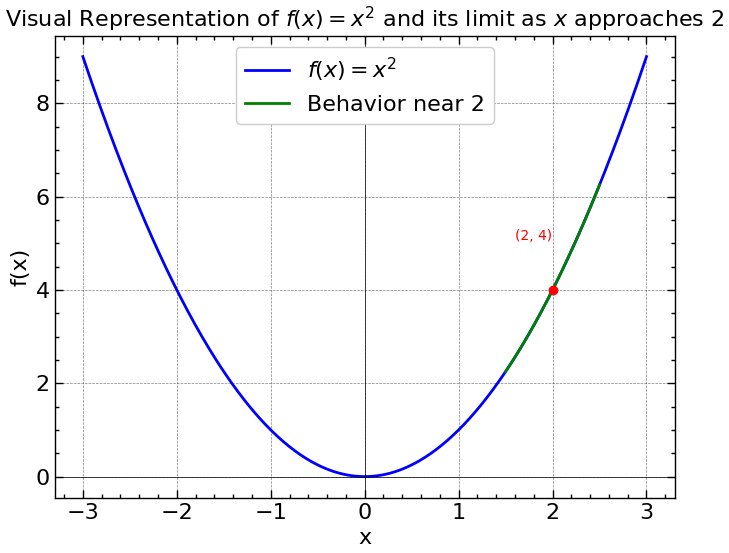

In [5]:
#Define the function
def f(x):
    return x**2

# Choose a specific value for 'a'
a = 2

# Generate x values
x_vals = np.linspace(-3, 3, 400)
f_vals = f(x_vals)

# Generate x values for the line segment near 'a'
delta = 0.5  # distance from 'a'
x_segment = np.linspace(a - delta, a + delta, 100)
f_segment = f(x_segment)

# Plot the function
plt.figure(figsize=(8,6))
plt.plot(x_vals, f_vals, label=r'$f(x)=x^2$', color='blue')

# Plot the line segment near 'a'
plt.plot(x_segment, f_segment, label='Behavior near ' + str(a), color='green', linewidth=2)

# Highlight the point (a, a^2)
plt.scatter([a], [a**2], color='red', zorder=5)  # zorder ensures the point is drawn on top
plt.text(a, a**2 + 1, f'({a}, {a**2})', verticalalignment='bottom', horizontalalignment='right', color='red')

# Set plot limits and labels
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.title(r'Visual Representation of $f(x) = x^2$ and its limit as $x$ approaches ' + str(a))
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
g = (3*x**2 - 5*x)*(2*x - 3)*(2*x**3 + 5*x - 6)*(4*x**5 - 3*x**2 + 2*x - 8)
g_prime = smp.diff(g, x)
print(g_prime.simplify())

528*x**10 - 1520*x**9 + 2160*x**8 - 4480*x**7 + 6258*x**6 - 4272*x**5 + 4085*x**4 - 5236*x**3 + 5088*x**2 - 3384*x + 720


In [11]:
g = (3*x**2 - 5*x)*(2*x - 3)*(2*x**3 + 5*x - 6)*(4*x**5 - 3*x**2 + 2*x - 8)
g_prime = smp.diff(g, x)
slope_at_minus_one = g_prime.subs(x, -1)
slope_at_minus_one

37731

In [12]:
g = (3*x**2 - 5*x)*(2*x - 3)*(2*x**3 + 5*x - 6)*(4*x**5 - 3*x**2 + 2*x - 8)
y_coordinate = g.subs(x, -1)
y_coordinate

-8840

# Task B Part I

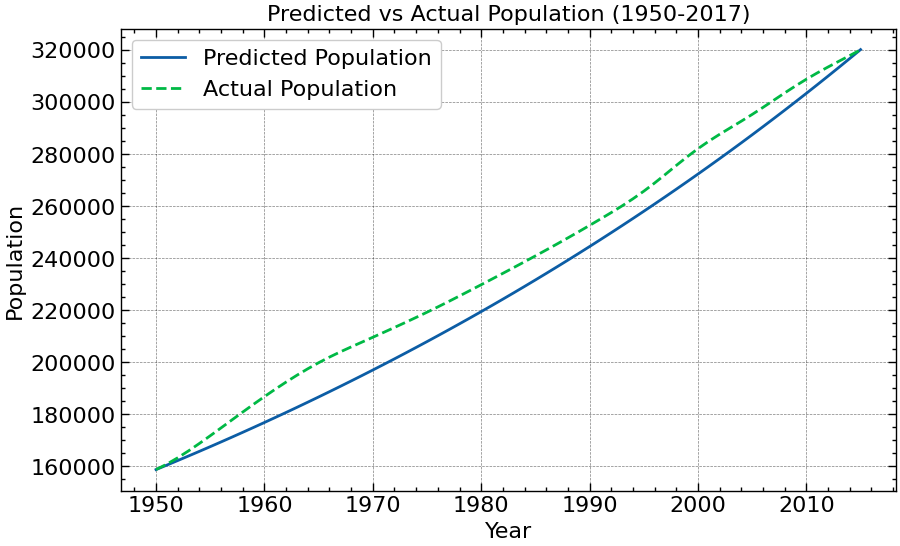

In [6]:
# Given values
P0 = 158804  # Population in 1950
r = 0.01078  # Growth rate
years = np.arange(1950, 2016)  # Years from 1950 to 2017

# Function to calculate population at time t
def population(t):
    return P0 * np.exp(r * (t - 1950))

# Predicted populations from 1950 through 2017
predicted_populations = population(years)

# Actual populations from 1950 through 2017
# Data provided earlier
actual_populations = np.array([
    158804, 160905, 163325, 165988, 168828, 171784, 174806, 177851, 180884, 183878,
    186808, 189655, 192398, 195016, 197492, 199816, 201975, 203982, 205880, 207733,
    209588, 211462, 213352, 215269, 217218, 219205, 221239, 223324, 225450, 227600,
    229763, 231939, 234133, 236344, 238574, 240824, 243099, 245403, 247740, 250113,
    252530, 254975, 257454, 260020, 262742, 265659, 268803, 272137, 275543, 278862,
    281983, 284852, 287507, 290028, 292539, 295130, 297827, 300595, 303374, 306076,
    308641, 311051, 313335, 315537, 317719, 319929
])

# Ensure that the actual_populations array has the same length as years
assert len(actual_populations) == len(years), "Mismatch in years and actual population data length"

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(years, predicted_populations, label='Predicted Population')
plt.plot(years, actual_populations, label='Actual Population', linestyle='dashed')
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Predicted vs Actual Population (1950-2017)')
plt.legend()
plt.grid(True)
plt.show()

# Task B Part II

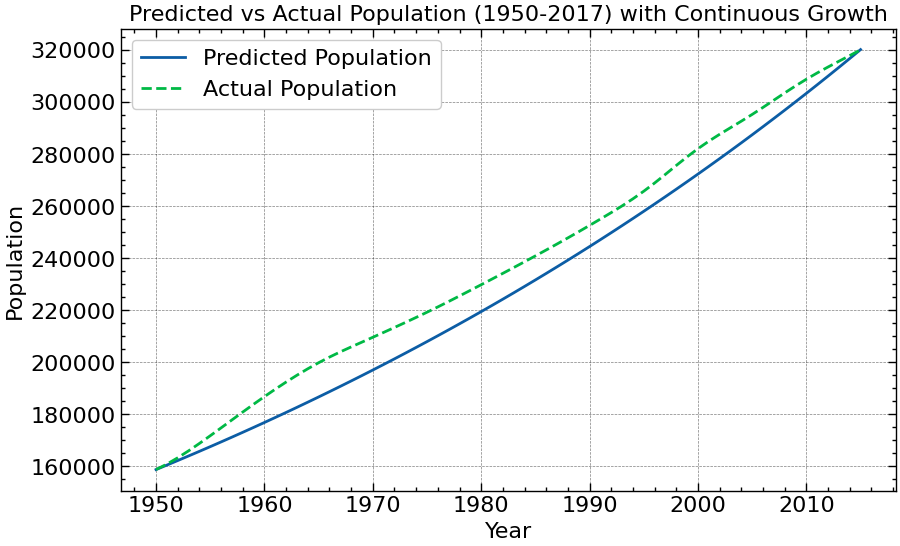

Predicted population in 2015: 320015.92
Predicted population in 2030: 376181.12
Percentage error for each year: [0.         0.23606007 0.64901905 1.18341779 1.79270712 2.43653886
 3.08404731 3.71093102 4.29936042 4.83726471 5.31462322 5.72516516
 6.06201972 6.31863248 6.49051769 6.5764009  6.5733164  6.48992647
 6.34784418 6.17725392 5.99977043 5.82303582 5.64563454 5.47233769
 5.30516426 5.14650358 4.99995567 4.8668688  4.74261741 4.61977984
 4.49366498 4.36426786 4.23362867 4.10128786 3.96800774 3.83412672
 3.7015565  3.57175407 3.44612775 3.3256506  3.21317595 3.10233494
 2.99525838 2.91155451 2.8760147  2.90135778 2.99697592 3.14690873
 3.30736587 3.4226842  3.45645617 3.39300252 3.2477376  3.04921745
 2.83962806 2.64880703 2.48481179 2.33560315 2.18141833 1.99411908
 1.75521856 1.45985412 1.11792113 0.74374164 0.35702185 0.02716781]


In [11]:
# Given values
P0 = 158804  # Population in 1950
r = 0.01078  # Growth rate
t0 = 1950  # Initial year
years = np.arange(1950, 2016)  # Years from 1950 to 2017

# Actual populations from 1950 through 2017 (from previous input)
actual_populations = np.array([
    158804, 160905, 163325, 165988, 168828, 171784, 174806, 177851, 180884, 183878,
    186808, 189655, 192398, 195016, 197492, 199816, 201975, 203982, 205880, 207733,
    209588, 211462, 213352, 215269, 217218, 219205, 221239, 223324, 225450, 227600,
    229763, 231939, 234133, 236344, 238574, 240824, 243099, 245403, 247740, 250113,
    252530, 254975, 257454, 260020, 262742, 265659, 268803, 272137, 275543, 278862,
    281983, 284852, 287507, 290028, 292539, 295130, 297827, 300595, 303374, 306076,
    308641, 311051, 313335, 315537, 317719, 319929
])

# Ensure that the actual_populations array has the same length as years
assert len(actual_populations) == len(years), "Mismatch in years and actual population data length"

# Function to calculate population using the continuous model
def predict_population(P0, r, t0, t):
    return P0 * np.exp(r * (t - t0))

# Predicted populations from 1950 through 2017
predicted_populations = predict_population(P0, r, t0, years)

# Predicted population in 2015 and 2030
P_2015 = predict_population(P0, r, t0, 2015)
P_2030 = predict_population(P0, r, t0, 2030)

# Percentage error for each year
percentage_error = np.abs((actual_populations - predicted_populations) / actual_populations) * 100

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(years, predicted_populations, label='Predicted Population')
plt.plot(years, actual_populations, label='Actual Population', linestyle='dashed')
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Predicted vs Actual Population (1950-2017) with Continuous Growth')
plt.legend()
plt.grid(True)
plt.show()

# Output predictions and percentage error
print(f"Predicted population in 2015: {P_2015:.2f}")
print(f"Predicted population in 2030: {P_2030:.2f}")
print(f"Percentage error for each year: {percentage_error}")


# Task C Part I

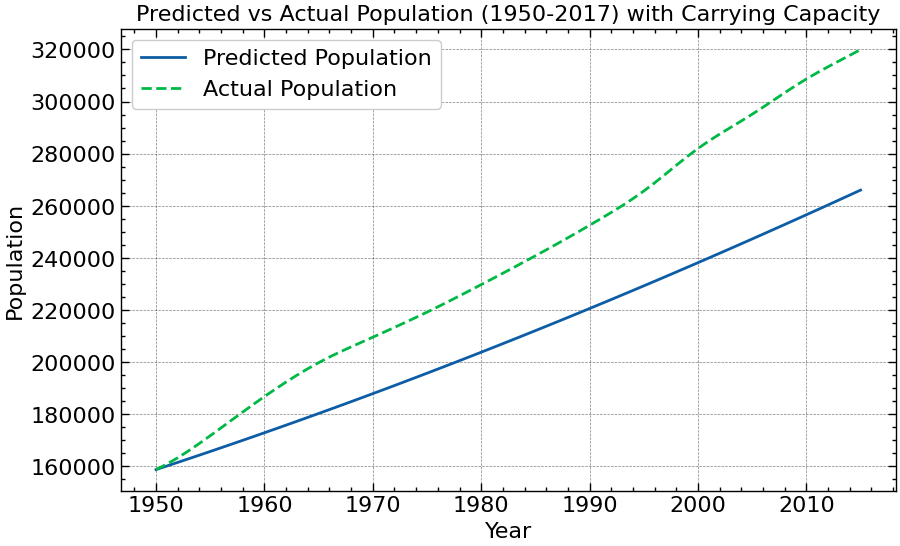

Predicted population in 2015: 266024.78
Predicted population in 2030: 295421.50
Percentage error for each year: [ 0.          0.45300954  1.08246533  1.83209514  2.65493537  3.51056013
  4.36825598  5.20404752  6.00053632  6.74613153  7.43136051  8.05050449
  8.597324    9.06595615  9.45260868  9.75664008  9.97579802 10.11904207
 10.20767251 10.27098426 10.3298083  10.39147153 10.45463005 10.52380974
 10.60089073 10.68808115 10.78870136 10.90392564 11.02933382 11.15794726
 11.28539892 11.41171062 11.53879343 11.66623471 11.79474874 11.92465349
 12.0577     12.19520474 12.33842414 12.48820513 12.64708052 12.80925337
 12.97662022 13.16668533 13.4013587  13.69154414 14.04505306 14.44719319
 14.85894004 15.23133517 15.53289326 15.75062078 15.89873586 16.00267328
 16.09931607 16.21443787 16.35478596 16.50983274 16.66260841 16.78926171
 16.87443752 16.91448764 16.91822428 16.89805187 16.87069894 16.8488067 ]


In [9]:
# Given values
P0 = 158804  # Population in 1950
r = 0.01078  # Growth rate
K = 800000  # Carrying capacity
years = np.arange(1950, 2016)  # Years from 1950 to 2017

# Actual populations from 1950 through 2017 (from previous input)
actual_populations = np.array([
    158804, 160905, 163325, 165988, 168828, 171784, 174806, 177851, 180884, 183878,
    186808, 189655, 192398, 195016, 197492, 199816, 201975, 203982, 205880, 207733,
    209588, 211462, 213352, 215269, 217218, 219205, 221239, 223324, 225450, 227600,
    229763, 231939, 234133, 236344, 238574, 240824, 243099, 245403, 247740, 250113,
    252530, 254975, 257454, 260020, 262742, 265659, 268803, 272137, 275543, 278862,
    281983, 284852, 287507, 290028, 292539, 295130, 297827, 300595, 303374, 306076,
    308641, 311051, 313335, 315537, 317719, 319929
])

# Ensure that the actual_populations array has the same length as years
assert len(actual_populations) == len(years), "Mismatch in years and actual population data length"

# Function to calculate population using the discrete model with carrying capacity
def predict_population(P0, r, K, t):
    predicted_populations = [P0]
    for year in range(1, t):
        Pt = predicted_populations[-1]
        P_next = Pt + r * Pt * (1 - Pt/K)
        predicted_populations.append(P_next)
    return np.array(predicted_populations)

# Predicted populations from 1950 through 2017
predicted_populations = predict_population(P0, r, K, len(years))

# Predicted population in 2015 and 2030
P_2015 = predicted_populations[years == 2015][0]
P_2030 = predict_population(P_2015, r, K, 2030-2015+1)[-1]

# Percentage error for each year
percentage_error = np.abs((actual_populations - predicted_populations) / actual_populations) * 100

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(years, predicted_populations, label='Predicted Population')
plt.plot(years, actual_populations, label='Actual Population', linestyle='dashed')
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Predicted vs Actual Population (1950-2017) with Carrying Capacity')
plt.legend()
plt.grid(True)
plt.show()

# Output predictions and percentage error
print(f"Predicted population in 2015: {P_2015:.2f}")
print(f"Predicted population in 2030: {P_2030:.2f}")
print(f"Percentage error for each year: {percentage_error}")

# Task C Part II

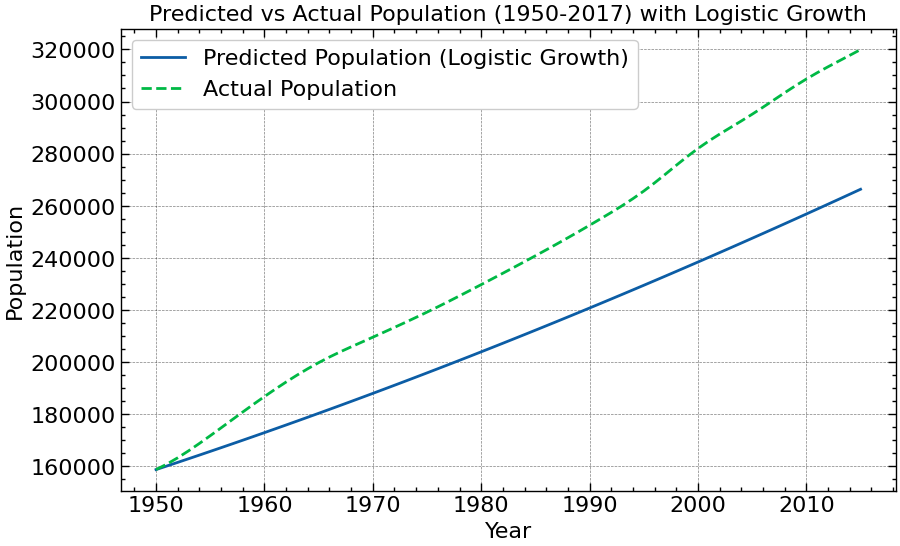

Predicted population in 2015: 266343.70
Predicted population in 2030: 295804.66
Percentage error for each year: [ 0.          0.45023735  1.07698347  1.82397566  2.64425451  3.49739395
  4.35267756  5.18612494  5.9803316   6.72370026  7.40675132  8.02375926
  8.56847723  9.03503461  9.41963168  9.72162051  9.93874174 10.07995269
 10.16655806 10.22786308 10.2847075  10.34442177 10.40566144 10.47295509
 10.54818433 10.63355913 10.73240255 10.84589041 10.96960043 11.09654967
 11.22236812 11.34707745 11.47259003 11.59849285 11.72550069 11.85393176
 11.98553848 12.12163851 12.26348947 12.41193919 12.56952296 12.73043888
 12.89658526 13.08548281 13.31906324 13.60824268 13.9608424  14.36215796
 14.77312722 15.14474172 15.44548162 15.66233662 15.80953642 15.91254028
 16.00826948 16.12252552 16.26206368 16.41634527 16.56838162 16.69429396
 16.77870849 16.81797137 16.82090366 16.79992331 16.77177802 16.74912392]


In [12]:
# Given values
P0 = 158804  # Population in 1950
r = 0.01078  # Growth rate
K = 800000  # Carrying capacity
t0 = 1950  # Initial year
years = np.arange(1950, 2016)  # Years from 1950 to 2017

# Actual populations from 1950 through 2017 (from previous input)
actual_populations = np.array([
    158804, 160905, 163325, 165988, 168828, 171784, 174806, 177851, 180884, 183878,
    186808, 189655, 192398, 195016, 197492, 199816, 201975, 203982, 205880, 207733,
    209588, 211462, 213352, 215269, 217218, 219205, 221239, 223324, 225450, 227600,
    229763, 231939, 234133, 236344, 238574, 240824, 243099, 245403, 247740, 250113,
    252530, 254975, 257454, 260020, 262742, 265659, 268803, 272137, 275543, 278862,
    281983, 284852, 287507, 290028, 292539, 295130, 297827, 300595, 303374, 306076,
    308641, 311051, 313335, 315537, 317719, 319929
])

# Ensure that the actual_populations array has the same length as years
assert len(actual_populations) == len(years), "Mismatch in years and actual population data length"

# Function to calculate population using the logistic growth model
def predict_population_logistic(P0, r, K, t0, t):
    return K / (1 + ((K - P0) / P0) * np.exp(-r * (t - t0)))

# Predicted populations from 1950 through 2017
predicted_populations = predict_population_logistic(P0, r, K, t0, years)

# Predicted population in 2015 and 2030
P_2015 = predict_population_logistic(P0, r, K, t0, 2015)
P_2030 = predict_population_logistic(P0, r, K, t0, 2030)

# Percentage error for each year
percentage_error = np.abs((actual_populations - predicted_populations) / actual_populations) * 100

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(years, predicted_populations, label='Predicted Population (Logistic Growth)')
plt.plot(years, actual_populations, label='Actual Population', linestyle='dashed')
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Predicted vs Actual Population (1950-2017) with Logistic Growth')
plt.legend()
plt.grid(True)
plt.show()

# Output predictions and percentage error
print(f"Predicted population in 2015: {P_2015:.2f}")
print(f"Predicted population in 2030: {P_2030:.2f}")
print(f"Percentage error for each year: {percentage_error}")
